## IRIS Flower Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Madhu datasets/IRIS Flower.csv')

In [7]:
data.shape

(150, 5)

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Data visualisation**

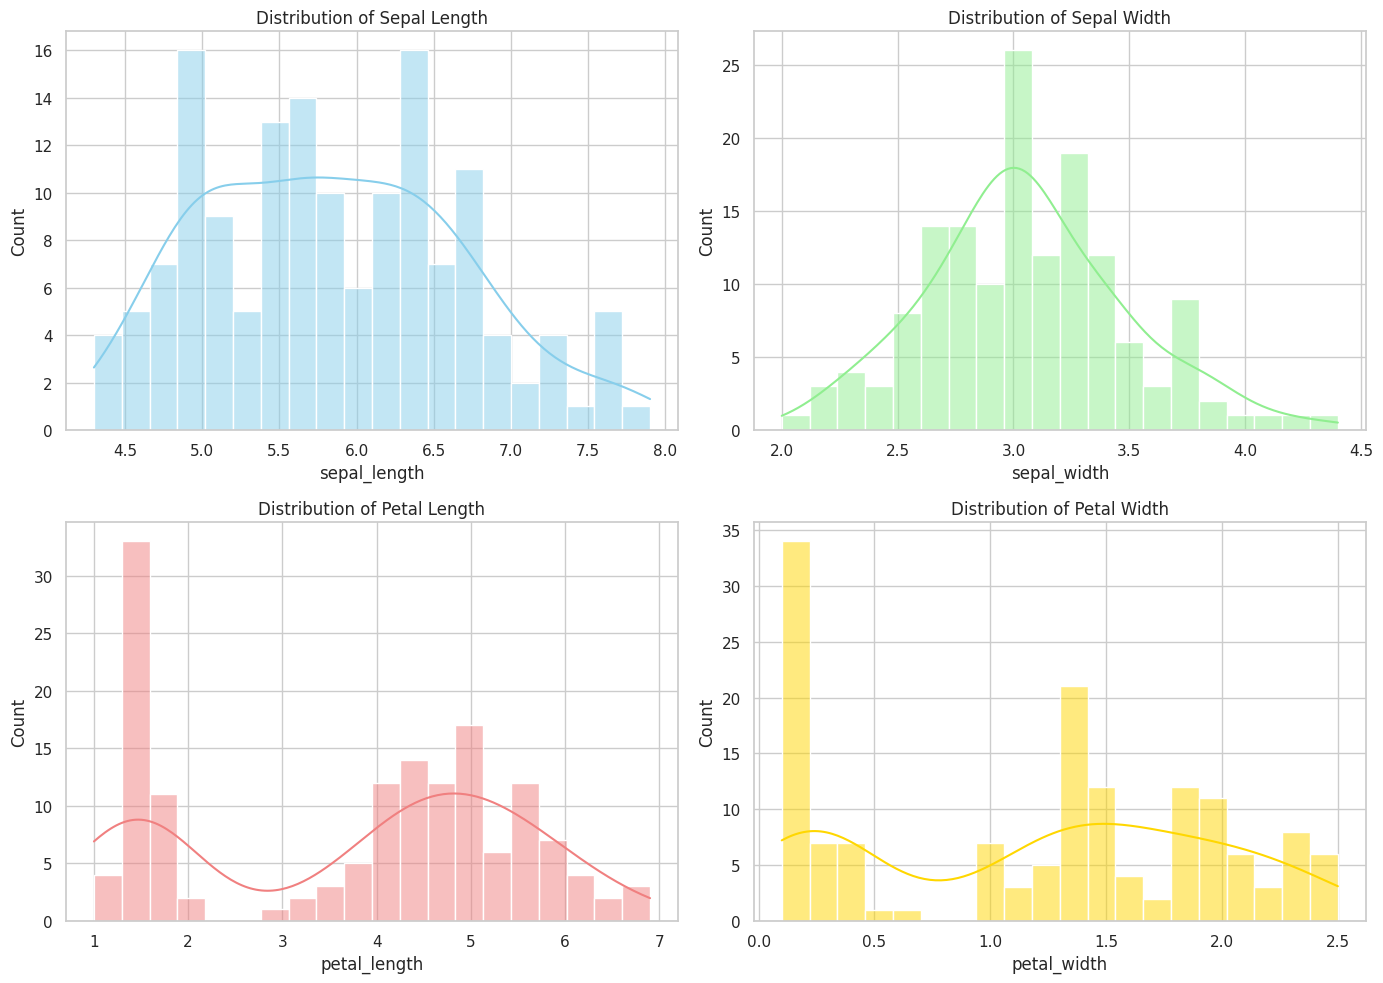

In [9]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create histograms for SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(data['sepal_length'], bins=20, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title('Distribution of Sepal Length')

sns.histplot(data['sepal_width'], bins=20, kde=True, ax=axes[0, 1], color="lightgreen")
axes[0, 1].set_title('Distribution of Sepal Width')

sns.histplot(data['petal_length'], bins=20, kde=True, ax=axes[1, 0], color="lightcoral")
axes[1, 0].set_title('Distribution of Petal Length')

sns.histplot(data['petal_width'], bins=20, kde=True, ax=axes[1, 1], color="gold")
axes[1, 1].set_title('Distribution of Petal Width')

plt.tight_layout()
plt.show()

<ipython-input-13-0ae5d4ac039b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal_length', data=data, ax=axes[0, 0], palette="Set3")
<ipython-input-13-0ae5d4ac039b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal_width', data=data, ax=axes[0, 1], palette="Set3")
<ipython-input-13-0ae5d4ac039b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal_length', data=data, ax=axes[1, 0], palette="Set3")
<ipython-input-13-0ae5d4ac039b>:16: FutureWarning: 

Passing `palette` without assig

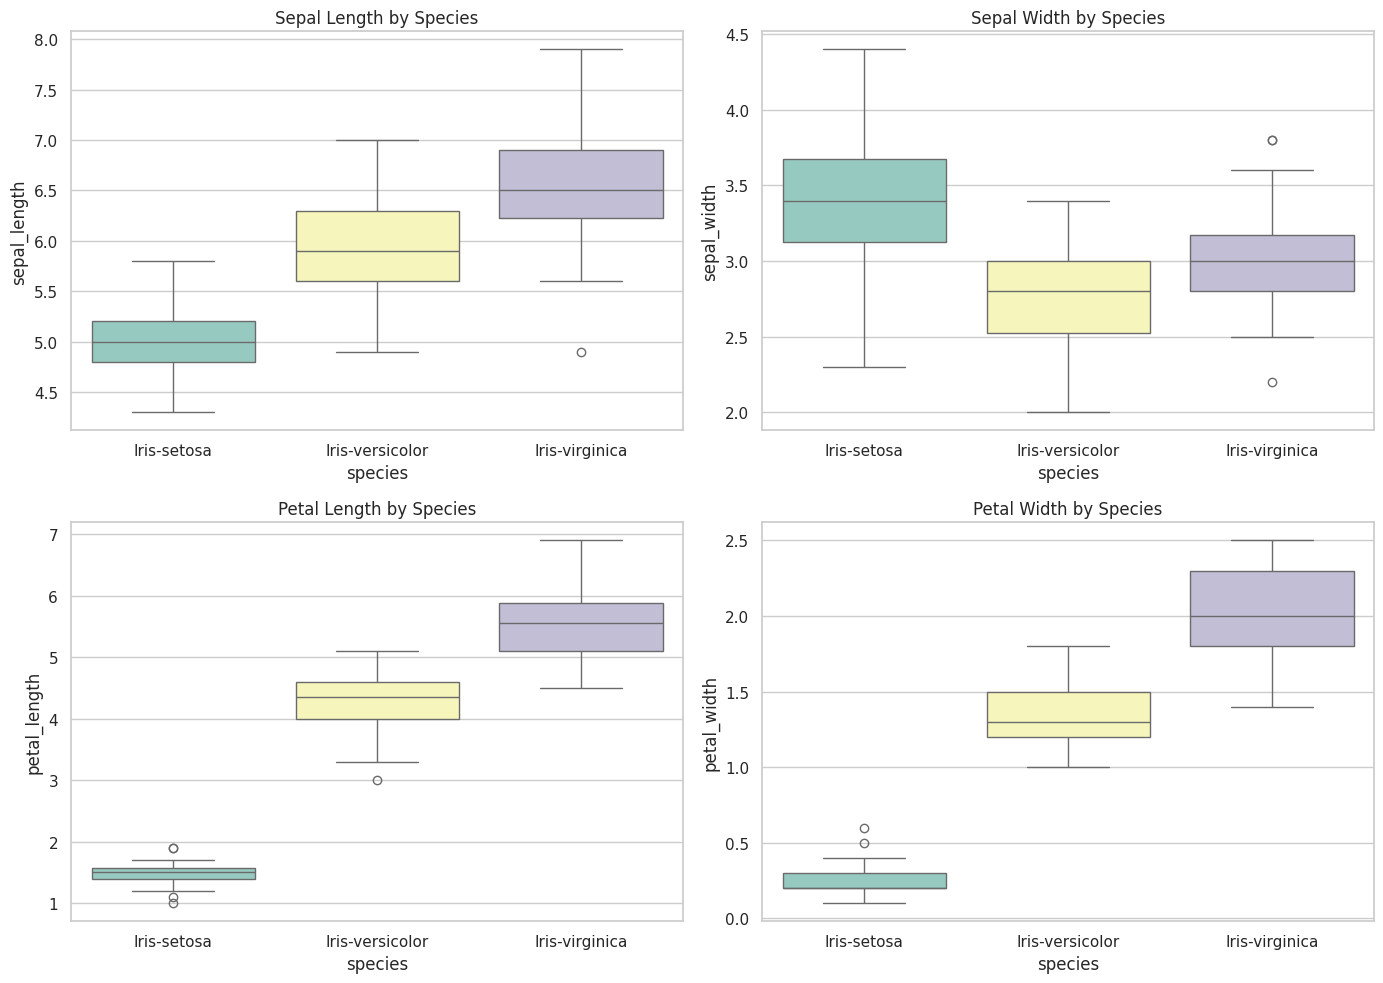

In [13]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create box plots for SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm by Species
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x='species', y='sepal_length', data=data, ax=axes[0, 0], palette="Set3")
axes[0, 0].set_title('Sepal Length by Species')

sns.boxplot(x='species', y='sepal_width', data=data, ax=axes[0, 1], palette="Set3")
axes[0, 1].set_title('Sepal Width by Species')

sns.boxplot(x='species', y='petal_length', data=data, ax=axes[1, 0], palette="Set3")
axes[1, 0].set_title('Petal Length by Species')

sns.boxplot(x='species', y='petal_width', data=data, ax=axes[1, 1], palette="Set3")
axes[1, 1].set_title('Petal Width by Species')

plt.tight_layout()
plt.show()

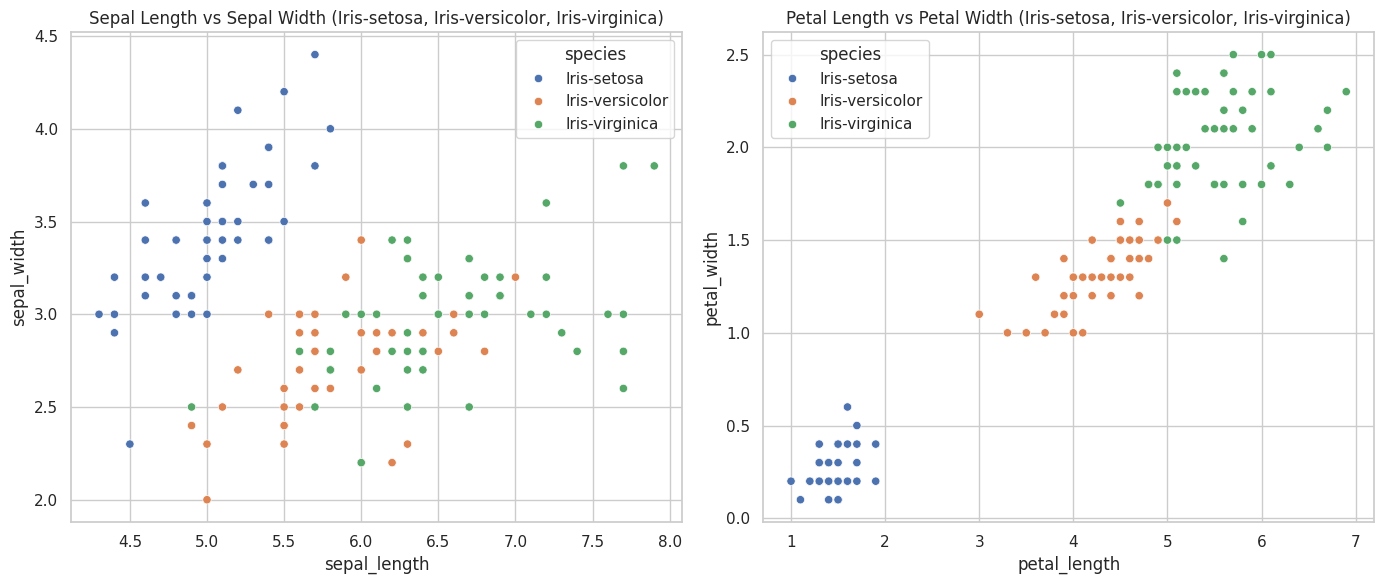

In [14]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data, ax=axes[0], palette="deep")
axes[0].set_title('Sepal Length vs Sepal Width (Iris-setosa, Iris-versicolor, Iris-virginica)')

sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=data, ax=axes[1], palette="deep")
axes[1].set_title('Petal Length vs Petal Width (Iris-setosa, Iris-versicolor, Iris-virginica)')

plt.tight_layout()
plt.show()

Let's implement the very basic step of data preprocessing.

In [15]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

Here, we are dividing the data into train and test splits, with 70% of the training data and 30% of the testing data.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Let's do the data scaling.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train);

In [19]:
y_pred = classifier.predict(X_test)

Let's print the results as follows:

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[15  0  0]
 [ 0 14  2]
 [ 0  2 12]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.88      0.88        16
 Iris-virginica       0.86      0.86      0.86        14

       accuracy                           0.91        45
      macro avg       0.91      0.91      0.91        45
   weighted avg       0.91      0.91      0.91        45

Accuracy: 0.9111111111111111


**Now we will apply KNN algorithm**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

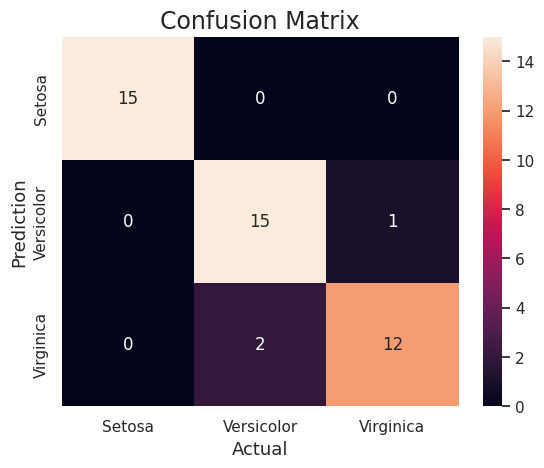

In [35]:
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [36]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.94      0.91        16
 Iris-virginica       0.92      0.86      0.89        14

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45

Accuracy: 0.9333333333333333
